In [18]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import os

# Net Structure
def Net1(inp_np_train, inp_np_test, out_np_train, out_np_test, epochs, NmU, NmNut, angles_train, angles_test, consider_angles):
    
    # Divide train and test
    if consider_angles:
        inp_np_train = np.append(np.transpose(np.expand_dims(angles_train,axis=0)),inp_np_train[:,0:NmU], axis = 1)
        inp_np_test = np.append(np.transpose(np.expand_dims(angles_test,axis=0)),inp_np_test[:,0:NmU], axis = 1)
    else:
        inp_np_train = inp_np_train[:,0:NmU]
        inp_np_test = inp_np_test[:,0:NmU]
    out_np_train = out_np_train[:,0:NmNut]
    out_np_test = out_np_test[:,0:NmNut]
    
    # Create NN Network 1
    Nin = inp_np_train.shape[1]
    Nout = out_np_train.shape[1]
    model = torch.nn.Sequential(
        torch.nn.Linear(Nin, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, Nout),
    )
    
    # Convert to torch
    inp_train = torch.from_numpy(inp_np_train).type(torch.float32)
    out_train = torch.from_numpy(out_np_train).type(torch.float32)
    inp_test = torch.from_numpy(inp_np_test).type(torch.float32)
    out_test = torch.from_numpy(out_np_test).type(torch.float32)
    
    # Loss Functions
    loss_fn = torch.nn.MSELoss(reduction='sum')
    
    learning_rate = 1e-4
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    tplot = []
    lossplottrain = []
    lossplottest = []
    
    for t in range(epochs):
        # Forward pass: compute predicted y by passing x to the model.
        y_pred_train = model(inp_train)
        y_pred_test = model(inp_test)
    
        # Compute and print loss.
        loss_train = loss_fn(y_pred_train, out_train)
        loss_test = loss_fn(y_pred_test, out_test)
        if t % 100 == 99:
            print(t, "loss on train" , loss_train.item())
            print(t, "loss on test" , loss_test.item())
            tplot.append(t)
            lossplottrain.append(loss_train.item())
            lossplottest.append(loss_test.item())
    
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()
    
        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss_train.backward()
    
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
    return tplot,lossplottrain,lossplottest,model

## Input Data
# Number of modes for U
NmU = 10 
# Number of modes for Nut
NmNut = 10
# Number of Epochs
Epochs = 10000

## Read the coefficients train
# U
inp_np_train_U = np.load("train/coeffL2U.npy")
# P
inp_np_train_P = np.load("train/coeffL2P.npy")
# Nut
out_np_train = np.load("train/coeffL2Nut.npy")
# Read Angles from file train
angles_train = np.loadtxt("train/angOff_mat.txt")
NOffSnap = np.load("train/NOffSnap.npy")
angles_train_np = []
# Fill the train angles
for k,j in enumerate(NOffSnap):
    for i in range(j):
        angles_train_np.append(angles_train[k])
angles_train_np = np.asarray(angles_train_np)

# Read the coefficients test
# U
inp_np_test_U = np.load("test/coeffL2U.npy")
# P
inp_np_test_P = np.load("test/coeffL2P.npy")
# Nut
out_np_test = np.load("test/coeffL2Nut.npy")
# Read Angles from file test
angles_test = np.loadtxt("test/angOn_mat.txt")
NOnSnap = np.load("test/NOnSnap.npy")
angles_test_np = []
# Fill the train angles
for k,j in enumerate(NOnSnap):
    for i in range(j):
        angles_test_np.append(angles_test[k])
angles_test_np = np.asarray(angles_test_np)

In [19]:
# Train a net without angles
t_plot1, lossplottrain1, lossplottest1,model1 = Net1(inp_np_train_U, inp_np_test_U, out_np_train, out_np_test,  Epochs, NmU, NmNut, angles_train_np, angles_test_np, False)

99 loss on train 0.023991625756025314
99 loss on test 0.00924385990947485
199 loss on train 0.013006212189793587
199 loss on test 0.004953916184604168
299 loss on train 0.009432208724319935
299 loss on test 0.0035852682776749134
399 loss on train 0.007152028381824493
399 loss on test 0.0027133063413202763
499 loss on train 0.005554786883294582
499 loss on test 0.0021028832998126745
599 loss on train 0.004232446197420359
599 loss on test 0.0015969999367371202
699 loss on train 0.003058489877730608
699 loss on test 0.001146786380559206
799 loss on train 0.0023021590895950794
799 loss on test 0.000862243352457881
899 loss on train 0.0018633462022989988
899 loss on test 0.0006977536249905825
999 loss on train 0.0015811248449608684
999 loss on test 0.0005924816359765828
1099 loss on train 0.0013751593651250005
1099 loss on test 0.000515459687449038
1199 loss on train 0.0012096022255718708
1199 loss on test 0.0004531869199126959
1299 loss on train 0.0010698499390855432
1299 loss on test 0.00

In [3]:
# Train a net with angles
t_plot2, lossplottrain2, lossplottest2,model2 = Net1(inp_np_train_U, inp_np_test_U, out_np_train, out_np_test,  Epochs, NmU, NmNut, angles_train_np, angles_test_np, True)


99 loss on train 5.971549034118652
99 loss on test 2.5760104656219482
199 loss on train 0.16366219520568848
199 loss on test 0.05496241897344589
299 loss on train 0.06670722365379333
299 loss on test 0.02291920594871044
399 loss on train 0.04424139857292175
399 loss on test 0.01668764464557171
499 loss on train 0.034943588078022
499 loss on test 0.013666072860360146
599 loss on train 0.029168663546442986
599 loss on test 0.011586438864469528
699 loss on train 0.025034256279468536
699 loss on test 0.010009683668613434
799 loss on train 0.021206451579928398
799 loss on test 0.008731338195502758
899 loss on train 0.016993239521980286
899 loss on test 0.0068952604196965694
999 loss on train 0.015228915959596634
999 loss on test 0.006147061008960009
1099 loss on train 0.01392076350748539
1099 loss on test 0.005573526956140995
1199 loss on train 0.01213726494461298
1199 loss on test 0.004849158227443695
1299 loss on train 0.011355945840477943
1299 loss on test 0.0045942761935293674
1399 loss

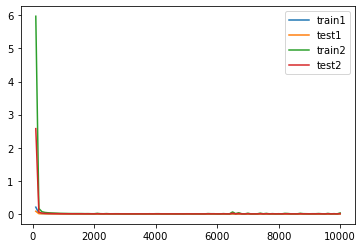

In [4]:
plt.plot(t_plot1, lossplottrain1, label="train1")
plt.plot(t_plot1, lossplottest1, label="test1")
plt.plot(t_plot2, lossplottrain2, label="train2")
plt.plot(t_plot2, lossplottest2, label="test2")
plt.legend()
plt.show()

In [5]:
inp_np_train_U[100,0:NmU].shape

(10,)

In [6]:
out_model = model1(torch.from_numpy(inp_np_train_U[100,0:NmU]).type(torch.float32))

In [7]:
out_torch = torch.from_numpy(out_np_train[100,0:NmNut]).type(torch.float32)

In [12]:
(out_model - out_torch)/out_torch*100

tensor([  -2.8978,   -3.6177,   -3.1317,  -53.0360,  -87.0661, -226.9347,
           9.6484,   -4.6611,  -87.3613,  -50.2747], grad_fn=<MulBackward0>)

In [9]:
out_model

tensor([ 4.2969e-03,  8.6416e-04,  2.7014e-03, -2.5519e-04,  7.9460e-06,
        -1.8694e-05, -4.2051e-04,  3.2825e-04, -2.2680e-05,  1.2030e-04],
       grad_fn=<AddBackward0>)

In [10]:
out_torch

tensor([ 4.4251e-03,  8.9659e-04,  2.7887e-03, -5.4338e-04,  6.1436e-05,
         1.4727e-05, -3.8351e-04,  3.4430e-04, -1.7944e-04,  2.4193e-04])